# 하이퍼파라미터 튜닝 모듈화

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from helper.util import *
from helper.plot import *
from helper.tensor import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[scatterd] >WARNING> From c:\Users\hyk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.



### [2] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/fish.xlsx", info=False)

## #02. 데이터 전처리

### [1] 데이터 스케일링

In [3]:
df = my_minmax_scaler(data=origin, yname="무게")

my_pretty_table(data=df.head())

+----+----------+----------+-----------+--------+
|    |     길이 |     높이 |      두께 |   무게 |
|----+----------+----------+-----------+--------|
|  0 |        0 |        0 |         0 |    5.9 |
|  1 | 0.148876 | 0.132834 | 0.0876672 |     32 |
|  2 | 0.185393 | 0.159963 |   0.15156 |     40 |
|  3 | 0.219101 | 0.231993 |  0.181278 |   51.5 |
|  4 | 0.252809 | 0.231993 |   0.22734 |     70 |
+----+----------+----------+-----------+--------+


### [2] 훈련/검증 데이터 분할

In [4]:
x_train, x_test, y_train, y_test = my_train_test_split(df, "무게")
rows, cols = x_train.shape

## #03. 하이퍼파라미터 튜닝

### [1] 훈련 모델 적합

모듈화 된 기능으로부터 최적의 하이퍼파라미터가 셋팅된 model 객체를 리턴받는다.

In [5]:
model = tf_tune(
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    dense_tune=[
        {"units": [64, 32, 16, 8], "activation": "relu", "input_shape": (cols,)},
        {"units": [32, 16, 8, 4], "activation": "relu"},
        {"units": 1, "activation": "linear"},
    ],
    optimizer="adam",
    loss="mse",
    metrics=["mae"],
    learning_rate=[0.01, 0.001, 0.0001],
)

model.summary()

Trial 18 Complete [00h 00m 02s]
val_mae: 342.3688049316406

Best val_mae So Far: 323.2122802734375
Total elapsed time: 00h 00m 29s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                256       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### [2] 최적 모델에 대한 학습 및 결과 확인

+-------+---------+---------+
|       |    loss |     mae |
|-------+---------+---------|
| train | 57507.7 | 214.689 |
| test  | 28358.3 | 164.202 |
+-------+---------+---------+


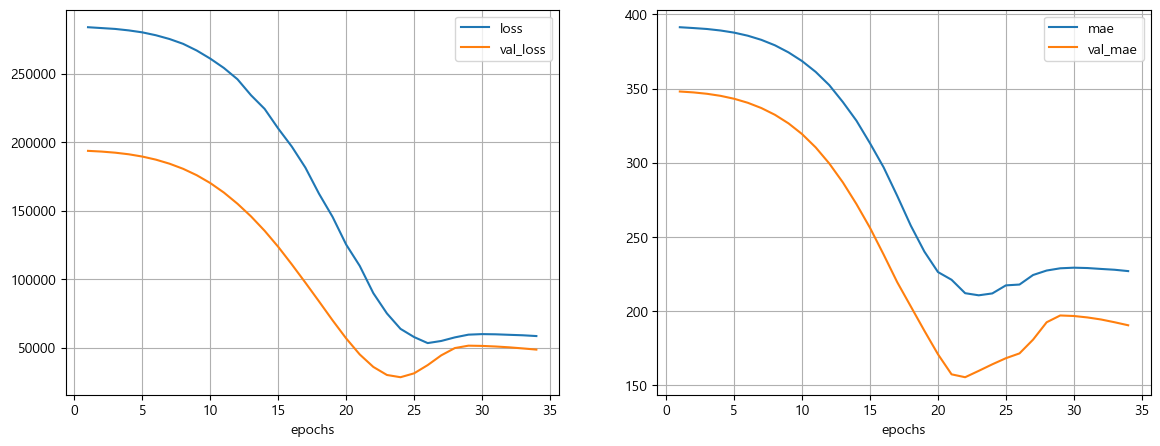

In [6]:
result = tf_train(
    model=model, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test
)
tf_result(result=result)